In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./.DS_Store
./apple_quality.html
./choose-your-apples.ipynb
./apple_quality.ipynb
./apple_quality.csv
./archive.zip


### Question
Which apple you should buy based on size and weight only? It is easy to say if an apple is good or bad after one tastes the apple, but is there a way to tell whether the apple is good or bad before tasting and by looking at the size and shapes only.

### Key Findings
Since size and weight are the only measurable attributes (from this data) here are the key findings on what are the best apples to buy based on size and weight
1. <font color='red'>Good apples tend to be big in sizes</font>
2. <font color='red'>The weight of the apple seem to have no affect on the quality of the apple</font>

### More Findings
1. <font color='blue'>If you're looking for sweetness, you better go for smaller of the bigger apples. I'd say medium sizes</font>
2. <font color='blue'>Juciness, Ripeness, and Crunchiness seems to be equally likely across good apples</font>
3. <font color='blue'>If you want acidity in your apples, you better pick the biggest of all apples</font>

📝 It is difficult to judge the size and weight of apples when one go to groceries. So to make a judgement, among the available apples, one should pick the apples with size that's bigger than the rest

In [6]:
# read the data into a pandas dataframe from a zip file
df = pd.read_csv(os.path.join(dirname, 'apple_quality.csv'))

# remove the row where Acidity is not a number
df = df[pd.to_numeric(df['Acidity'], errors='coerce').notnull()]
df['Acidity'] = df['Acidity'].astype(float)

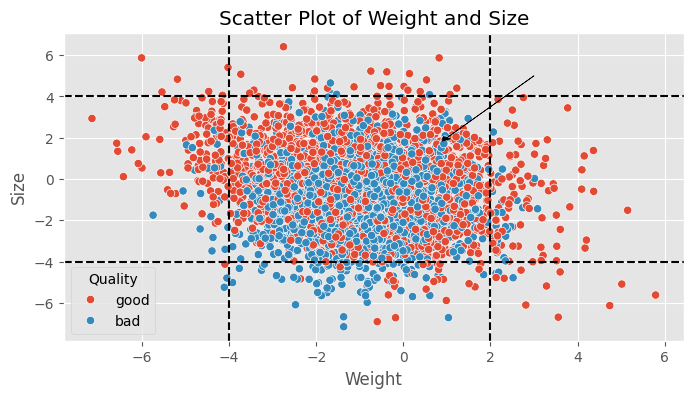

In [7]:
good_quality = df[df['Quality'] == 'good']
bad_quality = df[df['Quality'] == 'bad']

# plot a scatter plot of weight and size between good and bad apple
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Weight', y='Size', hue='Quality', data=df)
plt.title('Scatter Plot of Weight and Size')
# draw a vertical line at -4 and 2
plt.axvline(x=-4, color='black', linestyle='--')
plt.axvline(x=2, color='black', linestyle='--')
plt.axhline(y=4, color='black', linestyle='--')
plt.axhline(y=-4, color='black', linestyle='--')
# add an arrow to the plot to indicate the middle of the plot
plt.arrow(3, 5, -2, -3, head_width=0.2, head_length=0.2, fc='black', ec='black')
plt.show()
plt.close()

We can take a look at the distribution of the good and bad apples based on their size and weight in this plot. For a fair analysis of the data, we should only focus on the data where majority of the samples are. The below plot shows that we are only focusing on the samples that are in the middle of the plot. The rest of the samples are assumed to be extreme examples and not included in the analysis. After removing the outliers, 89% of the samples are retained and the there is a rough split of good and bad apples in the data

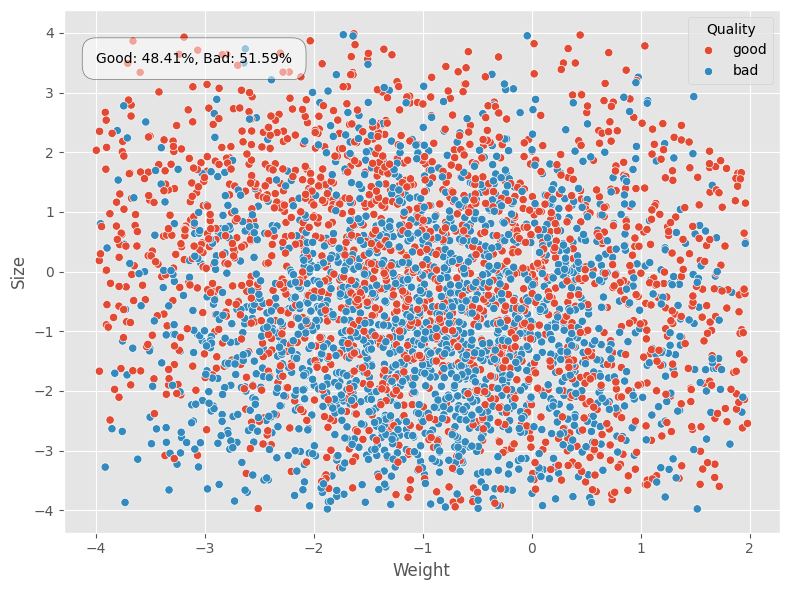

In [8]:
# rest of the dataframe
rest = df[(df['Weight'] > -4) & (df['Weight'] < 2) & (df['Size'] > -4) & (df['Size'] < 4)]

# scatter plot the rest of the dataframe
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight', y='Size', hue='Quality', data=rest)
# print the % of good and bad in the legend of the plot
good_perc = len(rest[rest['Quality'] == 'good']) / len(rest)
bad_perc = len(rest[rest['Quality'] == 'bad']) / len(rest)
# type the good and bad percentage in the plot in a box with rounded border
plt.text(-4, 3.5, f'Good: {good_perc * 100:.2f}%, Bad: {bad_perc*100:.2f}%', bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=1'))
plt.tight_layout()
plt.show()
plt.close()

Since we are limiting ourselves to only apply size and weight information to figure out the quailty of the apple, we can check the distrbution of size and weight between good and bad apples in the above `rest` dataframe

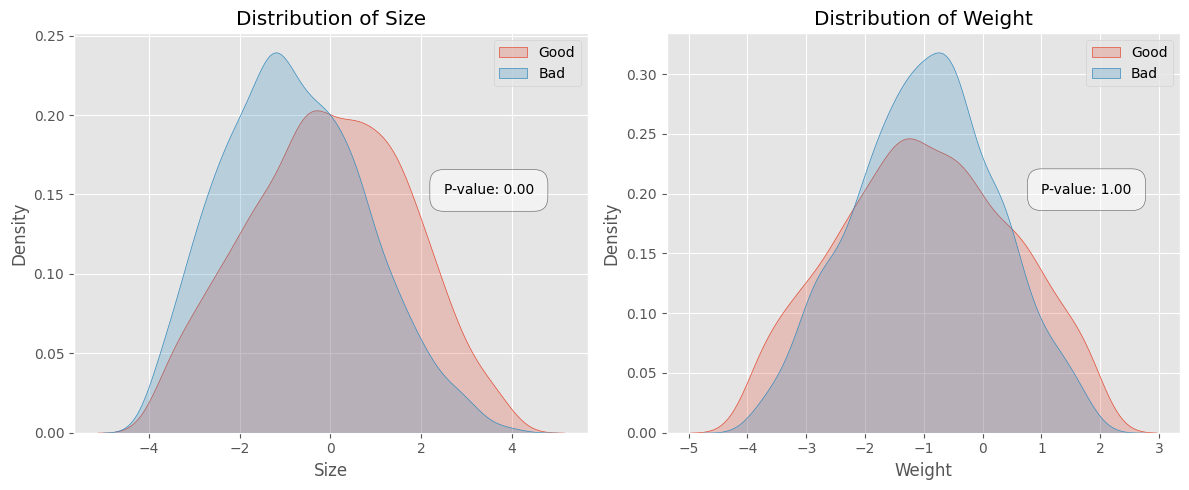

In [9]:
from scipy.stats import ttest_ind
'''
From the rest dataframe, plot the distribution of the features. What can you infer from the plot?
'''
rest_good = rest[rest['Quality'] == 'good']
rest_bad = rest[rest['Quality'] == 'bad']

# plot the distribution of the rest dataframe
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
# plot the distribution of the rest dataframe
sns.kdeplot(rest_good['Size'], label='Good', shade=True)
sns.kdeplot(rest_bad['Size'], label='Bad', shade=True)
# calculate the t-test for the means of two independent samples of scores
t_stat, p_value = ttest_ind(rest_good['Size'], rest_bad['Size'])
# type the t-statistic and p-value in the plot in a box with rounded border
plt.text(2.5, 0.15, f'P-value: {p_value:.2f}', bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=1'))
plt.title('Distribution of Size')
plt.legend()

plt.subplot(1, 2, 2)
# plot the distribution of the rest dataframe
sns.kdeplot(rest_good['Weight'], label='Good', shade=True)
sns.kdeplot(rest_bad['Weight'], label='Bad', shade=True)
# calculate the t-test for the means of two independent samples of scores
t_stat, p_value = ttest_ind(rest_good['Weight'], rest_bad['Weight'])
# type the t-statistic and p-value in the plot in a box with rounded border
plt.text(1, 0.2, f'P-value: {p_value:.2f}', bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=1'))
plt.title('Distribution of Weight')
plt.legend()

plt.tight_layout()
plt.show()
plt.close()

To find the the sifnificance of the distribution, we ran a independed two sample t-test on the size and weight distribution. Based on the p-value, weight as a feature proved to be non-significat, however, size is a very significant feature with a very low p-value. Based on the distribution plot above and the outcome of t-test, we can confidently say that the *bigger* apples tend to be *good* apples. '

#### <font color='red'>So, if you're buying apples, always buy big apples.</font>

Now that we established that the bigger apples tend to be good apples, we can analyze how bigger apples are in terms of swetness, juiciness, ripeness, crunchiness, and acidity. To define `big` apples, we set an arbitrary cutoff of `0`

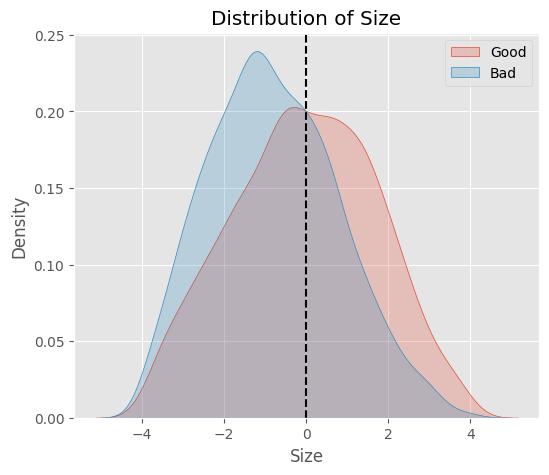

In [10]:
# plot the distribution of the rest dataframe
plt.figure(figsize=(6, 5))
# plot the distribution of the rest dataframe
sns.kdeplot(rest_good['Size'], label='Good', shade=True)
sns.kdeplot(rest_bad['Size'], label='Bad', shade=True)
plt.axvline(x=0, color='black', linestyle='--')
plt.title('Distribution of Size')
plt.legend()
plt.show()
plt.close()

So we get all the data where the quality of the apple is good, and then split the data into bigger_good (size > 0) and smaller_good (size < 0)

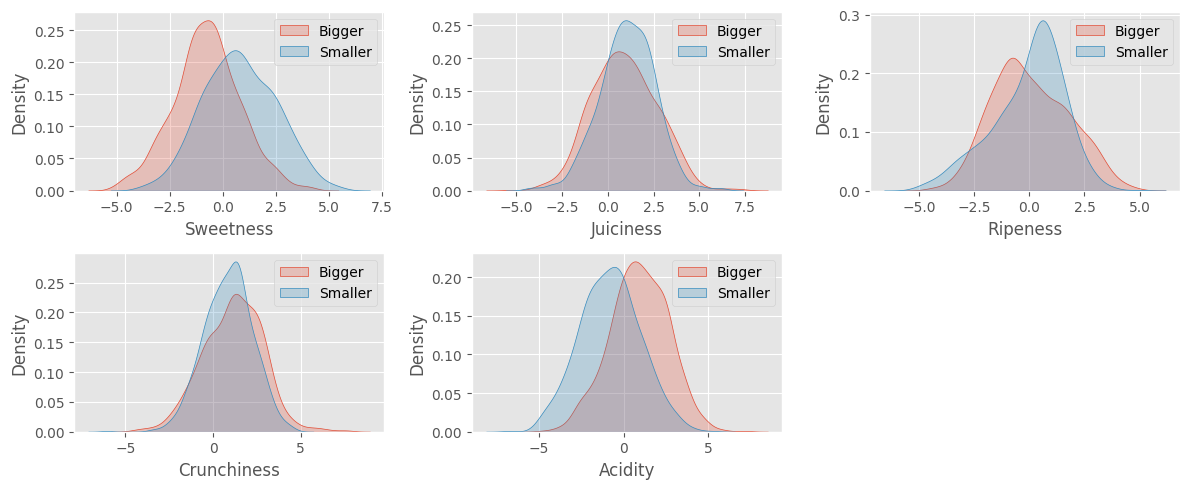

In [11]:
bigger_good = rest[(rest['Size'] > 0) & (rest['Quality'] == 'good')]
smaller_good = rest[(rest['Size'] < 0) & (rest['Quality'] == 'good')]

# plot the distribution of the sweetness, juiciness, ripeness, crunchiness and acidity of the bigger_good and smaller_good dataframe
plt.figure(figsize=(12, 5))
plt.subplot(2, 3, 1)
# plot the distribution of the rest dataframe
sns.kdeplot(bigger_good['Sweetness'], label='Bigger', shade=True)
sns.kdeplot(smaller_good['Sweetness'], label='Smaller', shade=True)
plt.legend()

plt.subplot(2, 3, 2)
# plot the distribution of the rest dataframe
sns.kdeplot(bigger_good['Juiciness'], label='Bigger', shade=True)
sns.kdeplot(smaller_good['Juiciness'], label='Smaller', shade=True)
plt.legend()

plt.subplot(2, 3, 3)
# plot the distribution of the rest dataframe
sns.kdeplot(bigger_good['Ripeness'], label='Bigger', shade=True)
sns.kdeplot(smaller_good['Ripeness'], label='Smaller', shade=True)
plt.legend()

plt.subplot(2, 3, 4)
# plot the distribution of the rest dataframe
sns.kdeplot(bigger_good['Crunchiness'], label='Bigger', shade=True)
sns.kdeplot(smaller_good['Crunchiness'], label='Smaller', shade=True)
plt.legend()

plt.subplot(2, 3, 5)
# plot the distribution of the rest dataframe
sns.kdeplot(bigger_good['Acidity'], label='Bigger', shade=True)
sns.kdeplot(smaller_good['Acidity'], label='Smaller', shade=True)
plt.legend()

plt.tight_layout()
plt.show()

### Findings
1. If you're looking for sweetness, you better go for smaller of the bigger apples. I'd say medium sizes
2. Juciness, Ripeness, and Crunchiness seems to be equally likely across good apples
3. If you want acidity in your apples, you better pick the biggest of all apples

Let's build a classifier to predict the quality of the apples. Since we are being very conservative on the selection of our data (not including extreme), the initial performance is not exceptional

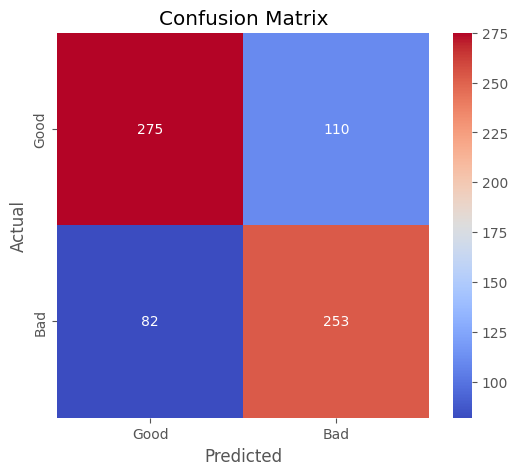

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       385
           1       0.70      0.76      0.72       335

    accuracy                           0.73       720
   macro avg       0.73      0.73      0.73       720
weighted avg       0.74      0.73      0.73       720



In [12]:
# build a classifier to predict the quality of the apple
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# split the data into features and target
X = rest.drop(['A_id', 'Quality'], axis=1)
y = rest['Quality']
# convert the target to 0 and 1
y = y.map({'good': 1, 'bad': 0})

# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# build a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# plot a confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix')
# replace the 0 and 1 with good and bad
plt.xticks([0.5, 1.5], ['Good', 'Bad'])
plt.yticks([0.5, 1.5], ['Good', 'Bad'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()
plt.close()

# print the classification report
print(classification_report(y_test, y_pred))

Logistic regression is a simple classifier. We can try with a tree-based classifier to see if the performance improves with the help of a more complex prediction model. We will employ RandomForest as the prediction model

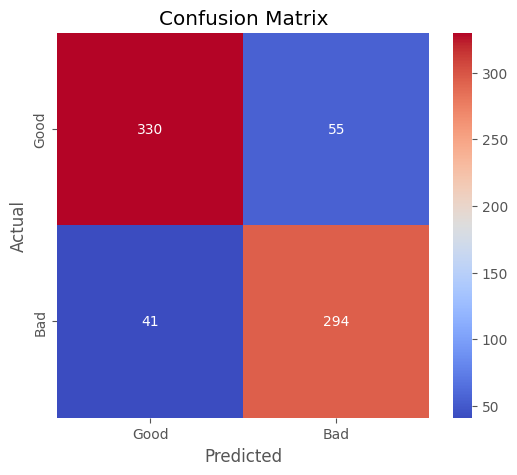

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       385
           1       0.84      0.88      0.86       335

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



In [13]:
# build a classifier to predict the quality of the apple
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# split the data into features and target
X = rest.drop(['A_id', 'Quality'], axis=1)
y = rest['Quality']
# convert the target to 0 and 1
y = y.map({'good': 1, 'bad': 0})

# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# build a random forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)


# make predictions
y_pred = model.predict(X_test)

# plot a confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix')
# replace the 0 and 1 with good and bad
plt.xticks([0.5, 1.5], ['Good', 'Bad'])
plt.yticks([0.5, 1.5], ['Good', 'Bad'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()
plt.close()

# print the classification report
print(classification_report(y_test, y_pred))

Given everything else is similar, the performance after employing RandomeForest improved to an F1-score of 88%.

Since we are only focusing on the data that excludes extreme samples, and F1-score of 88% is satisfactory. The performance will definitely improve if all data is included. 